## FEATURES IN DATASET:

### YSRCP dataset
    1. Comments  : comments by public on the speech
    2. Emotion   : reaction of public towards speech
    
### TDP dataset
    1. Comments  : comments by public on the speech
    2. Emotion   : reaction of public towards speech


## PROJECT SCOPE:
    1.This project gives scope to predict how much percentage of public are towards to that party.
    2.This project gives scope to predict the result of election if election happen today by      providing real-time data


## APPLIED MODELS:

MACHINE LEARNING: <br>
        1. Mulitnomial Navies Bayes <br>
        2. Guassian Navies Bayes <br>
        3. Logistic Regression <br>
        4. Linear Discriminant Analysis (LDA) <br>
        5. Decision Tree <br>
        6. Random Forest <br>
        7. Support Vector Machine <br>
        8. K-Nearest Neighbours (KNN) <br>
DEEP LEARNING: <br>
        9. Long Short Term Memory (LSTM) <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# READING THE DATA SET

In [2]:
ysrcp_train = pd.read_csv(r"dataset\campagin_speeches\ysrcp_camp_train.csv")
tdp_train   = pd.read_csv(r"dataset\campagin_speeches\tdp_camp_train.csv")

# DATA ANALYSIS

### YSRCP

In [3]:
ysrcp_train.head()

,Unnamed: 0,Comments,Emotion
0,0,"do not talk about corruption yourself, babu, y...",Positive
1,1,dislikers cbn bach,Negative
2,2,polavaram project pattiseema project amaravati...,Negative
3,3,sure tdp will win this election,Negative
4,4,jai tdp jai cbn,Negative


In [4]:
ysrcp_train.describe()

,Unnamed: 0
count,608.00000
mean,303.50000
std,175.65876
min,0.00000
25%,151.75000
50%,303.50000
75%,455.25000
max,607.00000


In [5]:
ysrcp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  608 non-null    int64 
 1   Comments    608 non-null    object
 2   Emotion     608 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.4+ KB


In [6]:
ysrcp_train.columns

Index(['Unnamed: 0', 'Comments', 'Emotion'], dtype='object')

In [7]:
ysrcp_train.shape

(608, 3)

### TDP

In [8]:
tdp_train.head()

,Unnamed: 0,Comments,Emotion
0,0,oh god now he beg for bjp or,Positive
1,1,piikinaru now andhraloli eddie sheep,Negative
2,2,bye bye babu,Negative
3,3,"if i vote for you, all your leaders are frauds...",Negative
4,4,smile,Positive


In [9]:
tdp_train.describe()

,Unnamed: 0
count,503.000000
mean,251.000000
std,145.347859
min,0.000000
25%,125.500000
50%,251.000000
75%,376.500000
max,502.000000


In [10]:
tdp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  503 non-null    int64 
 1   Comments    494 non-null    object
 2   Emotion     503 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.9+ KB


In [11]:
tdp_train.columns

Index(['Unnamed: 0', 'Comments', 'Emotion'], dtype='object')

In [12]:
tdp_train.shape

(503, 3)

# CHECKING FOR NULL VALUES

### YSRCP

In [13]:
ysrcp_train.isnull().sum()

Unnamed: 0    0
Comments      0
Emotion       0
dtype: int64

### TDP

In [14]:
tdp_train.isnull().sum()

Unnamed: 0    0
Comments      9
Emotion       0
dtype: int64

In [15]:
tdp_train = tdp_train.dropna()

In [16]:
tdp_train.isnull().sum()

Unnamed: 0    0
Comments      0
Emotion       0
dtype: int64

# CHECKING FOR DUPLICTAES

### YSRCP

In [17]:
ysrcp_train.duplicated().sum()

0

### TDP

In [18]:
tdp_train.duplicated().sum()

0

## DATA VISUALIZATION

### YSRCP

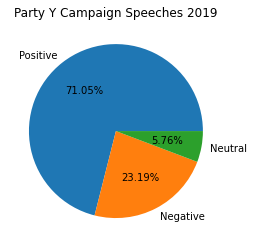

In [19]:
ysrcp_dic = {}
for i in ysrcp_train['Emotion']:
    if i in ysrcp_dic:
        ysrcp_dic[i] = ysrcp_dic[i] + 1
    else:
        ysrcp_dic[i] = 1
plt.pie(ysrcp_dic.values(),labels=ysrcp_dic.keys(),autopct='%.2f%%')
plt.title("Party Y Campaign Speeches 2019")
plt.show()

### TDP

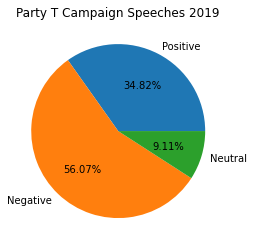

In [20]:
tdp_dic = {}
for i in tdp_train['Emotion']:
    if i in tdp_dic:
        tdp_dic[i] = tdp_dic[i] + 1
    else:
        tdp_dic[i] = 1
plt.pie(tdp_dic.values(),labels=tdp_dic.keys(),autopct='%.2f%%')
plt.title("Party T Campaign Speeches 2019")
plt.show()

In [21]:
num_ysrcp_emotion = []
for i in ysrcp_train['Emotion']:
    if i=='Positive':
        num_ysrcp_emotion.append(1.0)
    elif i=='Negative':
        num_ysrcp_emotion.append(0.0)
    else:
        num_ysrcp_emotion.append(2.0)
ysrcp_train['num_emotion'] = num_ysrcp_emotion

In [22]:
num_tdp_emotion = []
for i in tdp_train['Emotion']:
    if i=='Positive':
        num_tdp_emotion.append(1.0)
    elif i=='Negative':
        num_tdp_emotion.append(0.0)
    else:
        num_tdp_emotion.append(2.0)
tdp_train['num_emotion'] = num_tdp_emotion

## DATA PREPROCESSING

In [23]:
import re
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

C:\Users\posah\anacondap\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [24]:
lm = WordNetLemmatizer()
sw = stopwords.words('English')

### YSRCP

In [25]:
ysrcp_comments = []
ysrcp_max_len = 0
ysrcp_unique = set()
for i in ysrcp_train['Comments']:
    p = re.sub(r'http\S+|www\S+|@\w+', ' ', i)
    p = re.sub(r'[^a-z]',' ',p)
    p = re.sub('[.+|,+]',' ',p)
    p = word_tokenize(p)
    p = [k for k in p if k not in sw]
    p = [lm.lemmatize(k) for k in p]
    ysrcp_unique = ysrcp_unique | set(p)
    ysrcp_max_len = max(len(p),ysrcp_max_len)
    p = ' '.join(p)
    if p=='':
        ysrcp_comments.append(np.nan)
    else:
        ysrcp_comments.append(p)
print('DONE')
print("Maximum length of sentence : ",ysrcp_max_len)
ysrcp_n_words = len(ysrcp_unique)
print("Maximum number of words : ",ysrcp_n_words)

DONE
Maximum length of sentence :  150
Maximum number of words :  1504


In [26]:
ysrcp_train['pre_pro_comm'] = ysrcp_comments

In [27]:
ysrcp_train.isnull().sum()

Unnamed: 0       0
Comments         0
Emotion          0
num_emotion      0
pre_pro_comm    10
dtype: int64

In [28]:
ysrcp_train.dropna(inplace = True)

In [29]:
ysrcp_train.isnull().sum()

Unnamed: 0      0
Comments        0
Emotion         0
num_emotion     0
pre_pro_comm    0
dtype: int64

In [30]:
ysrcp_train.shape

(598, 5)

### TDP

In [31]:
tdp_comments = []
tdp_max_len = 0
tdp_unique = set()
for i in tdp_train['Comments']:
    p = re.sub(r'http\S+|www\S+|@\w+', ' ', i)
    p = re.sub(r'[^a-z]',' ',p)
    p = re.sub('[.+|,+]',' ',p)
    p = word_tokenize(p)
    p = [i for i in p if i not in sw]
    p = [lm.lemmatize(i) for i in p]
    tdp_unique = tdp_unique | set(p)
    tdp_max_len = max(len(p),tdp_max_len)
    p = ' '.join(p)
    p = re.sub(' +',' ',p)
    if p=='':
        tdp_comments.append(np.nan)
    else:
        tdp_comments.append(p)
print('DONE')
print("Maximum length of sentence : ",tdp_max_len)
tdp_n_words = len(tdp_unique)
print("Maximum number of words : ",tdp_n_words)

DONE
Maximum length of sentence :  47
Maximum number of words :  1146


In [32]:
tdp_train['pre_pro_comm'] = tdp_comments

In [33]:
tdp_train.isnull().sum()

Unnamed: 0       0
Comments         0
Emotion          0
num_emotion      0
pre_pro_comm    13
dtype: int64

In [34]:
tdp_train.dropna(inplace = True)

In [35]:
tdp_train.isnull().sum()

Unnamed: 0      0
Comments        0
Emotion         0
num_emotion     0
pre_pro_comm    0
dtype: int64

# Transforming the words into vectors using tf-idf

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
tf_idf = TfidfVectorizer()

### YSRCP

In [38]:
ysrcp_features = tf_idf.fit_transform(ysrcp_train['pre_pro_comm']).toarray()
print(ysrcp_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### TDP

In [39]:
tdp_features = tf_idf.fit_transform(tdp_train['pre_pro_comm']).toarray()
print(tdp_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# X & Y ARRAY

### YSRCP

In [40]:
ysrcp_x = ysrcp_features
ysrcp_y = ysrcp_train.iloc[:,-2]
print(ysrcp_x.shape,ysrcp_y.shape)
print(type(ysrcp_x),type(ysrcp_y))

(598, 1491) (598,)
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [41]:
ysrcp_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
ysrcp_y

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
603    0.0
604    1.0
605    0.0
606    2.0
607    1.0
Name: num_emotion, Length: 598, dtype: float64

### TDP

In [43]:
tdp_x = tdp_features
tdp_y = tdp_train.iloc[:,-2]
print(tdp_x.shape,tdp_y.shape)
print(type(tdp_x),type(tdp_y))

(481, 1136) (481,)
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [44]:
tdp_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
tdp_y

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
496    0.0
497    1.0
498    1.0
499    2.0
501    1.0
Name: num_emotion, Length: 481, dtype: float64

# Spliting data into training and testing

In [46]:
from sklearn.model_selection import train_test_split

### YSRCP

In [47]:
ysrcp_x_train,ysrcp_x_test,ysrcp_y_train,ysrcp_y_test = \
        train_test_split(ysrcp_x,ysrcp_y,test_size=0.25,random_state=42)

In [48]:
print(ysrcp_x_train)
print(ysrcp_x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [49]:
print(ysrcp_y_train,ysrcp_y_test)

601    1.0
575    1.0
349    0.0
335    1.0
557    1.0
      ... 
72     1.0
108    1.0
273    0.0
440    1.0
104    0.0
Name: num_emotion, Length: 448, dtype: float64 112    1.0
290    0.0
572    1.0
78     0.0
184    1.0
      ... 
119    1.0
386    1.0
409    1.0
33     1.0
0      1.0
Name: num_emotion, Length: 150, dtype: float64


In [50]:
print(ysrcp_x_train.shape,ysrcp_x_test.shape)
print(ysrcp_y_train.shape,ysrcp_y_test.shape)

(448, 1491) (150, 1491)
(448,) (150,)


### TDP

In [51]:
tdp_x_train,tdp_x_test,tdp_y_train,tdp_y_test = \
        train_test_split(tdp_x,tdp_y,test_size=0.25,random_state=42)

In [52]:
print(tdp_x_train)
print(tdp_x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [53]:
print(tdp_y_train,tdp_y_test)

68     1.0
408    0.0
88     0.0
32     0.0
86     1.0
      ... 
108    1.0
277    0.0
356    0.0
450    1.0
104    0.0
Name: num_emotion, Length: 360, dtype: float64 75     0.0
429    0.0
403    0.0
285    0.0
412    1.0
      ... 
178    1.0
239    0.0
415    0.0
25     1.0
18     1.0
Name: num_emotion, Length: 121, dtype: float64


# MODEL SELECTION

# MODEL TRAINING

### YSRCP

1. `Multinomial Naive Bayes`

In [54]:
from sklearn.naive_bayes import MultinomialNB
ysrcp_mnb = MultinomialNB()
ysrcp_mnb.fit(ysrcp_x_train,ysrcp_y_train)

MultinomialNB()

In [55]:
ysrcp_mnb_pred = ysrcp_mnb.predict(ysrcp_x_test)
ysrcp_mnb_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [56]:
print('Training score : ',ysrcp_mnb.score(ysrcp_x_train,ysrcp_y_train))
print('Testing score  : ',ysrcp_mnb.score(ysrcp_x_test,ysrcp_y_test))

Training score :  0.7879464285714286
Testing score  :  0.7


In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [58]:
ysrcp_mnb_acc = accuracy_score(ysrcp_y_test,ysrcp_mnb_pred)
ysrcp_mnb_pr  = precision_score(ysrcp_y_test,ysrcp_mnb_pred,average='macro',zero_division=0.0)
ysrcp_mnb_rec = recall_score(ysrcp_y_test,ysrcp_mnb_pred,average='macro',zero_division=0.0)
ysrcp_mnb_f1  = f1_score(ysrcp_y_test,ysrcp_mnb_pred,average='macro',zero_division=0.0)
print('Accuracy by MNB  : ', ysrcp_mnb_acc)
print('Precision by MNB : ', ysrcp_mnb_pr)
print('Recall by MNB    : ', ysrcp_mnb_rec)
print('F1 score by MNB  : ', ysrcp_mnb_f1)

Accuracy by MNB  :  0.7
Precision by MNB :  0.5632183908045977
Recall by MNB    :  0.37209302325581395
F1 score by MNB  :  0.3415532879818594


In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
print(confusion_matrix(ysrcp_y_test,ysrcp_mnb_pred))
print(classification_report(ysrcp_y_test,ysrcp_mnb_pred))

[[  5  38   0]
 [  0 100   0]
 [  0   7   0]]
              precision    recall  f1-score   support

         0.0       1.00      0.12      0.21        43
         1.0       0.69      1.00      0.82       100
         2.0       0.00      0.00      0.00         7

    accuracy                           0.70       150
   macro avg       0.56      0.37      0.34       150
weighted avg       0.75      0.70      0.60       150



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. `Gaussian Navies Bayes`

In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
ysrcp_gnb = GaussianNB()
ysrcp_gnb.fit(ysrcp_x_train,ysrcp_y_train)

GaussianNB()

In [63]:
ysrcp_gnb_pred = ysrcp_gnb.predict(ysrcp_x_test)
ysrcp_gnb_pred

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 2., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 2., 1.,
       1., 0., 2., 2., 0., 0., 0., 1., 1., 0., 0., 1., 2., 1., 0., 1., 1.,
       0., 2., 1., 0., 0., 0., 2., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 2., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 2., 0., 0., 1., 2., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 2., 1., 0.,
       1., 1., 2., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.])

In [64]:
print("Training Score : ",ysrcp_gnb.score(ysrcp_x_train,ysrcp_y_train))
print("Testing Score  : ",ysrcp_gnb.score(ysrcp_x_test,ysrcp_y_test))

Training Score :  0.7723214285714286
Testing Score  :  0.44666666666666666


In [65]:
ysrcp_gnb_acc = accuracy_score(ysrcp_y_test,ysrcp_gnb_pred)
ysrcp_gnb_pr  = precision_score(ysrcp_y_test,ysrcp_gnb_pred,average='macro')
ysrcp_gnb_rec = recall_score(ysrcp_y_test,ysrcp_gnb_pred,average='macro')
ysrcp_gnb_f1  = f1_score(ysrcp_y_test,ysrcp_gnb_pred,average='macro')
print('Accuracy by MNB  : ', ysrcp_gnb_acc)
print('Precision by MNB : ', ysrcp_gnb_pr)
print('Recall by MNB    : ', ysrcp_gnb_rec)
print('F1 score by MNB  : ', ysrcp_gnb_f1)

Accuracy by MNB  :  0.44666666666666666
Precision by MNB :  0.364057239057239
Recall by MNB    :  0.3914396456256921
F1 score by MNB  :  0.36243772435141614


In [66]:
print(confusion_matrix(ysrcp_y_test,ysrcp_gnb_pred))
print(classification_report(ysrcp_y_test,ysrcp_gnb_pred))

[[18 21  4]
 [47 47  6]
 [ 1  4  2]]
              precision    recall  f1-score   support

         0.0       0.27      0.42      0.33        43
         1.0       0.65      0.47      0.55       100
         2.0       0.17      0.29      0.21         7

    accuracy                           0.45       150
   macro avg       0.36      0.39      0.36       150
weighted avg       0.52      0.45      0.47       150



3. `Logistic Regression`

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
ysrcp_lr = LogisticRegression()
ysrcp_lr.fit(ysrcp_x_train,ysrcp_y_train)

LogisticRegression()

In [69]:
ysrcp_lr_pred = ysrcp_lr.predict(ysrcp_x_test)
ysrcp_lr_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [70]:
print("Training Score : ",ysrcp_lr.score(ysrcp_x_train,ysrcp_y_train))
print("Testing Score  : ",ysrcp_lr.score(ysrcp_x_test,ysrcp_y_test))

Training Score :  0.9017857142857143
Testing Score  :  0.7133333333333334


In [71]:
ysrcp_lr_acc = accuracy_score(ysrcp_y_test,ysrcp_lr_pred)
ysrcp_lr_pr  = precision_score(ysrcp_y_test,ysrcp_lr_pred,average='macro',zero_division=0.0)
ysrcp_lr_rec = recall_score(ysrcp_y_test,ysrcp_lr_pred,average='macro',zero_division=0.0)
ysrcp_lr_f1  = f1_score(ysrcp_y_test,ysrcp_lr_pred,average='macro',zero_division=0.0)
print('Accuracy by MNB  : ', ysrcp_lr_acc)
print('Precision by MNB : ', ysrcp_lr_pr)
print('Recall by MNB    : ', ysrcp_lr_rec)
print('F1 score by MNB  : ', ysrcp_lr_f1)

Accuracy by MNB  :  0.7133333333333334
Precision by MNB :  0.5664335664335663
Recall by MNB    :  0.3875968992248062
F1 score by MNB  :  0.367681755829904


In [72]:
print(confusion_matrix(ysrcp_y_test,ysrcp_lr_pred))
print(classification_report(ysrcp_y_test,ysrcp_lr_pred))

[[  7  36   0]
 [  0 100   0]
 [  0   7   0]]
              precision    recall  f1-score   support

         0.0       1.00      0.16      0.28        43
         1.0       0.70      1.00      0.82       100
         2.0       0.00      0.00      0.00         7

    accuracy                           0.71       150
   macro avg       0.57      0.39      0.37       150
weighted avg       0.75      0.71      0.63       150



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. `Linear Discriminant Analysis`

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [74]:
ysrcp_lda = LinearDiscriminantAnalysis()
ysrcp_lda.fit(ysrcp_x_train,ysrcp_y_train)

LinearDiscriminantAnalysis()

In [75]:
ysrcp_lda_pred = ysrcp_lda.predict(ysrcp_x_test)
ysrcp_lda_pred

array([1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [76]:
print("Training Score : ",ysrcp_lda.score(ysrcp_x_train,ysrcp_y_train))
print("Testing Score  : ",ysrcp_lda.score(ysrcp_x_test,ysrcp_y_test))

Training Score :  0.9955357142857143
Testing Score  :  0.7333333333333333


In [77]:
ysrcp_lda_acc = accuracy_score(ysrcp_y_test,ysrcp_lda_pred)
ysrcp_lda_pr  = precision_score(ysrcp_y_test,ysrcp_lda_pred,average='macro',zero_division=0.0)
ysrcp_lda_rec = recall_score(ysrcp_y_test,ysrcp_lda_pred,average='macro',zero_division=0.0)
ysrcp_lda_f1  = f1_score(ysrcp_y_test,ysrcp_lda_pred,average='macro',zero_division=0.0)
print('Accuracy by lda  : ', ysrcp_lda_acc)
print('Precision by lda : ', ysrcp_lda_pr)
print('Recall by lda    : ', ysrcp_lda_rec)
print('F1 score by lda  : ', ysrcp_lda_f1)

Accuracy by lda  :  0.7333333333333333
Precision by lda :  0.4835732742709487
Recall by lda    :  0.4329457364341085
F1 score by lda  :  0.43281477438136823


In [78]:
print(confusion_matrix(ysrcp_y_test,ysrcp_lda_pred))
print(classification_report(ysrcp_y_test,ysrcp_lda_pred))

[[15 28  0]
 [ 5 95  0]
 [ 1  6  0]]
              precision    recall  f1-score   support

         0.0       0.71      0.35      0.47        43
         1.0       0.74      0.95      0.83       100
         2.0       0.00      0.00      0.00         7

    accuracy                           0.73       150
   macro avg       0.48      0.43      0.43       150
weighted avg       0.70      0.73      0.69       150



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5. `Decision Tree`

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
ysrcp_dt = DecisionTreeClassifier()
ysrcp_dt.fit(ysrcp_x_train,ysrcp_y_train)

DecisionTreeClassifier()

In [81]:
ysrcp_dt_pred = ysrcp_dt.predict(ysrcp_x_test)
ysrcp_dt_pred

array([1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 2., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 2., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.])

In [82]:
print("Training Score : ",ysrcp_dt.score(ysrcp_x_train,ysrcp_y_train))
print("Testing Score  : ",ysrcp_dt.score(ysrcp_x_test,ysrcp_y_test))

Training Score :  0.9977678571428571
Testing Score  :  0.7466666666666667


In [83]:
ysrcp_dt_acc = accuracy_score(ysrcp_y_test,ysrcp_dt_pred)
ysrcp_dt_pr  = precision_score(ysrcp_y_test,ysrcp_dt_pred,average='macro')
ysrcp_dt_rec = recall_score(ysrcp_y_test,ysrcp_dt_pred,average='macro')
ysrcp_dt_f1  = f1_score(ysrcp_y_test,ysrcp_dt_pred,average='macro')
print('Accuracy by dt  : ', ysrcp_dt_acc)
print('Precision by dt : ', ysrcp_dt_pr)
print('Recall by dt    : ', ysrcp_dt_rec)
print('F1 score by dt  : ', ysrcp_dt_f1)

Accuracy by dt  :  0.7466666666666667
Precision by dt :  0.6329156223893065
Recall by dt    :  0.523765227021041
F1 score by dt  :  0.5448345862276778


In [84]:
print(confusion_matrix(ysrcp_y_test,ysrcp_dt_pred))
print(classification_report(ysrcp_y_test,ysrcp_dt_pred))

[[14 26  3]
 [ 4 96  0]
 [ 1  4  2]]
              precision    recall  f1-score   support

         0.0       0.74      0.33      0.45        43
         1.0       0.76      0.96      0.85       100
         2.0       0.40      0.29      0.33         7

    accuracy                           0.75       150
   macro avg       0.63      0.52      0.54       150
weighted avg       0.74      0.75      0.71       150



6. `Random Forest`

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
ysrcp_rf = RandomForestClassifier(n_estimators=100, random_state=42)
ysrcp_rf.fit(ysrcp_x_train,ysrcp_y_train)

RandomForestClassifier(random_state=42)

In [87]:
ysrcp_rf_pred = ysrcp_rf.predict(ysrcp_x_test)
ysrcp_rf_pred

array([1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 2., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [88]:
print("Training Score : ",ysrcp_rf.score(ysrcp_x_train,ysrcp_y_train))
print("Testing Score  : ",ysrcp_rf.score(ysrcp_x_test,ysrcp_y_test))

Training Score :  0.9977678571428571
Testing Score  :  0.74


In [89]:
ysrcp_rf_acc = accuracy_score(ysrcp_y_test,ysrcp_rf_pred)
ysrcp_rf_pr  = precision_score(ysrcp_y_test,ysrcp_rf_pred,average='macro')
ysrcp_rf_rec = recall_score(ysrcp_y_test,ysrcp_rf_pred,average='macro')
ysrcp_rf_f1  = f1_score(ysrcp_y_test,ysrcp_rf_pred,average='macro')
print('Accuracy by rf  : ', ysrcp_rf_acc)
print('Precision by rf : ', ysrcp_rf_pr)
print('Recall by rf    : ', ysrcp_rf_rec)
print('F1 score by rf  : ', ysrcp_rf_f1)

Accuracy by rf  :  0.74
Precision by rf :  0.9064748201438849
Recall by rf    :  0.4983388704318936
F1 score by rf  :  0.5424727914267663


In [90]:
print(confusion_matrix(ysrcp_y_test,ysrcp_rf_pred))
print(classification_report(ysrcp_y_test,ysrcp_rf_pred))

[[  9  34   0]
 [  0 100   0]
 [  0   5   2]]
              precision    recall  f1-score   support

         0.0       1.00      0.21      0.35        43
         1.0       0.72      1.00      0.84       100
         2.0       1.00      0.29      0.44         7

    accuracy                           0.74       150
   macro avg       0.91      0.50      0.54       150
weighted avg       0.81      0.74      0.68       150



7. `Support Vector machine`

In [91]:
from sklearn.svm import SVC

In [92]:
ysrcp_svm = SVC(kernel='linear', C=1.0, random_state=42)
ysrcp_svm.fit(ysrcp_x_train,ysrcp_y_train)

SVC(kernel='linear', random_state=42)

In [93]:
ysrcp_svm_pred = ysrcp_svm.predict(ysrcp_x_test)
ysrcp_svm_pred

array([1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [94]:
print("Training Score : ",ysrcp_svm.score(ysrcp_x_train,ysrcp_y_train))
print("Testing Score  : ",ysrcp_svm.score(ysrcp_x_test,ysrcp_y_test))

Training Score :  0.9754464285714286
Testing Score  :  0.7466666666666667


In [95]:
ysrcp_svm_acc = accuracy_score(ysrcp_y_test,ysrcp_svm_pred)
ysrcp_svm_pr  = precision_score(ysrcp_y_test,ysrcp_svm_pred,average='macro',zero_division=0.0)
ysrcp_svm_rec = recall_score(ysrcp_y_test,ysrcp_svm_pred,average='macro',zero_division=0.0)
ysrcp_svm_f1  = f1_score(ysrcp_y_test,ysrcp_svm_pred,average='macro',zero_division=0.0)
print('Accuracy by svm  : ', ysrcp_svm_acc)
print('Precision by svm : ', ysrcp_svm_pr)
print('Recall by svm    : ', ysrcp_svm_rec)
print('F1 score by svm  : ', ysrcp_svm_f1)

Accuracy by svm  :  0.7466666666666667
Precision by svm :  0.5333333333333333
Recall by svm    :  0.4307751937984496
F1 score by svm  :  0.43027635118610913


In [96]:
print(confusion_matrix(ysrcp_y_test,ysrcp_svm_pred))
print(classification_report(ysrcp_y_test,ysrcp_svm_pred))

[[13 30  0]
 [ 1 99  0]
 [ 1  6  0]]
              precision    recall  f1-score   support

         0.0       0.87      0.30      0.45        43
         1.0       0.73      0.99      0.84       100
         2.0       0.00      0.00      0.00         7

    accuracy                           0.75       150
   macro avg       0.53      0.43      0.43       150
weighted avg       0.74      0.75      0.69       150



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8. `KNN`

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
ysrcp_knn = KNeighborsClassifier(n_neighbors=5)
ysrcp_knn.fit(ysrcp_x_train,ysrcp_y_train)

KNeighborsClassifier()

In [99]:
ysrcp_knn_pred = ysrcp_knn.predict(ysrcp_x_test)
ysrcp_knn_pred

array([1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

In [100]:
print("Training Score : ",ysrcp_knn.score(ysrcp_x_train,ysrcp_y_train))
print("Testing Score  : ",ysrcp_knn.score(ysrcp_x_test,ysrcp_y_test))

Training Score :  0.8102678571428571
Testing Score  :  0.7466666666666667


In [101]:
ysrcp_knn_acc = accuracy_score(ysrcp_y_test,ysrcp_knn_pred)
ysrcp_knn_pr  = precision_score(ysrcp_y_test,ysrcp_knn_pred,average='macro',zero_division=0.0)
ysrcp_knn_rec = recall_score(ysrcp_y_test,ysrcp_knn_pred,average='macro',zero_division=0.0)
ysrcp_knn_f1  = f1_score(ysrcp_y_test,ysrcp_knn_pred,average='macro',zero_division=0.0)
print('Accuracy by knn  : ', ysrcp_knn_acc)
print('Precision by knn : ', ysrcp_knn_pr)
print('Recall by knn    : ', ysrcp_knn_rec)
print('F1 score by knn  : ', ysrcp_knn_f1)

Accuracy by knn  :  0.7466666666666667
Precision by knn :  0.5201238390092878
Recall by knn    :  0.4351937984496124
F1 score by knn  :  0.43595612780162135


In [102]:
print(confusion_matrix(ysrcp_y_test,ysrcp_knn_pred))
print(classification_report(ysrcp_y_test,ysrcp_knn_pred))

[[14 29  0]
 [ 2 98  0]
 [ 1  6  0]]
              precision    recall  f1-score   support

         0.0       0.82      0.33      0.47        43
         1.0       0.74      0.98      0.84       100
         2.0       0.00      0.00      0.00         7

    accuracy                           0.75       150
   macro avg       0.52      0.44      0.44       150
weighted avg       0.73      0.75      0.69       150



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


9. `LSTM`

In [103]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, SpatialDropout1D, Embedding, Bidirectional, LSTM, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import pad_sequences
import tensorflow as tf
from keras.preprocessing.text import Tokenizer

In [104]:
ysrcp_x_trf = [str(i) for i in ysrcp_x_train]
tokenizer = Tokenizer(num_words = ysrcp_n_words)
tokenizer.fit_on_texts(ysrcp_x_trf)

def Tokenization_padSequences(x, maxlen = ysrcp_max_len):
    xseq = tokenizer.texts_to_sequences(x)
    xpad = pad_sequences(xseq, padding='post', maxlen = ysrcp_max_len)
    return xpad

ysrcp_x_tef = [str(i) for i in ysrcp_x_test]
ysrcp_xtrain_pad = Tokenization_padSequences(ysrcp_x_trf,maxlen=ysrcp_max_len)
ysrcp_xtest_pad = Tokenization_padSequences(ysrcp_x_tef,maxlen=ysrcp_max_len)

In [105]:
ysrcp_xtrain_pad

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [106]:
Metrics = [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
            tf.keras.metrics.Precision(name = 'precision'),
            tf.keras.metrics.Recall(name='recall'),
            tf.keras.metrics.F1Score(name='f1-score')]

In [107]:
ysrcp_lstm = Sequential()
ysrcp_lstm.add(Embedding(ysrcp_n_words, 64, input_length=ysrcp_max_len))
ysrcp_lstm.add(SpatialDropout1D(0.2))
ysrcp_lstm.add(Bidirectional(LSTM(256, dropout=0.2)))
ysrcp_lstm.add(Dense(1, activation ='sigmoid'))
ysrcp_lstm.compile(optimizer='Adam', metrics= Metrics, loss = 'binary_crossentropy')
ysrcp_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           96256     
                                                                 
 spatial_dropout1d (Spatial  (None, 150, 64)           0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 512)               657408    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 754177 (2.88 MB)
Trainable params: 754177 (2.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
ysrcp_lstm.fit(ysrcp_xtrain_pad, ysrcp_y_train, epochs=5)

Epoch 1/5
14/14 [==============================] - 14s 796ms/step - loss: 0.6344 - accuracy: 0.7009 - precision: 0.7885 - recall: 0.9266 - f1-score: 0.9126
Epoch 2/5
14/14 [==============================] - 11s 788ms/step - loss: 0.4486 - accuracy: 0.7411 - precision: 0.7902 - recall: 1.0000 - f1-score: 0.9126
Epoch 3/5
14/14 [==============================] - 15s 1s/step - loss: 0.4512 - accuracy: 0.7411 - precision: 0.7902 - recall: 1.0000 - f1-score: 0.9126
Epoch 4/5
14/14 [==============================] - 14s 938ms/step - loss: 0.4446 - accuracy: 0.7411 - precision: 0.7902 - recall: 1.0000 - f1-score: 0.9126
Epoch 5/5
14/14 [==============================] - 12s 876ms/step - loss: 0.4406 - accuracy: 0.7411 - precision: 0.7902 - recall: 1.0000 - f1-score: 0.9126


In [109]:
ysrcp_lstm_pred = (ysrcp_lstm.predict(ysrcp_xtest_pad) > 0.5).astype(int)
print(confusion_matrix(ysrcp_y_test,ysrcp_lstm_pred))
print(classification_report(ysrcp_y_test, ysrcp_lstm_pred))

5/5 [==============================] - 1s 97ms/step
[[  0  43   0]
 [  0 100   0]
 [  0   7   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        43
         1.0       0.67      1.00      0.80       100
         2.0       0.00      0.00      0.00         7

    accuracy                           0.67       150
   macro avg       0.22      0.33      0.27       150
weighted avg       0.44      0.67      0.53       150



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
ysrcp_lstm_acc = accuracy_score(ysrcp_y_test, ysrcp_lstm_pred)
ysrcp_lstm_pr  = precision_score(ysrcp_y_test, ysrcp_lstm_pred,average='macro',zero_division=0.0)
ysrcp_lstm_rec = recall_score(ysrcp_y_test, ysrcp_lstm_pred,average='macro',zero_division=0.0)
ysrcp_lstm_f1  = f1_score(ysrcp_y_test, ysrcp_lstm_pred,average='macro',zero_division=0.0)
print('Accuracy by lstm  : ', ysrcp_lstm_acc)
print('Precision by lstm : ', ysrcp_lstm_pr)
print('Recall by lstm    : ', ysrcp_lstm_rec)
print('F1 score by lstm  : ', ysrcp_lstm_f1)

Accuracy by lstm  :  0.6666666666666666
Precision by lstm :  0.2222222222222222
Recall by lstm    :  0.3333333333333333
F1 score by lstm  :  0.26666666666666666


### TDP

1. `Multinomial Naive Bayes`

In [111]:
tdp_mnb = MultinomialNB()
tdp_mnb.fit(tdp_x_train,tdp_y_train)

MultinomialNB()

In [112]:
tdp_mnb_pred = tdp_mnb.predict(tdp_x_test)
tdp_mnb_pred

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0.])

In [113]:
print('Training score : ',tdp_mnb.score(tdp_x_train,tdp_y_train))
print('Testing score  : ',tdp_mnb.score(tdp_x_test,tdp_y_test))

Training score :  0.8916666666666667
Testing score  :  0.743801652892562


In [114]:
tdp_mnb_acc = accuracy_score(tdp_y_test,tdp_mnb_pred)
tdp_mnb_pr  = precision_score(tdp_y_test,tdp_mnb_pred,average='macro',zero_division=0.0)
tdp_mnb_rec = recall_score(tdp_y_test,tdp_mnb_pred,average='macro',zero_division=0.0)
tdp_mnb_f1  = f1_score(tdp_y_test,tdp_mnb_pred,average='macro',zero_division=0.0)
print('Accuracy by mnb  : ', tdp_mnb_acc)
print('Precision by mnb : ', tdp_mnb_pr)
print('Recall by mnb    : ', tdp_mnb_rec)
print('F1 score by mnb  : ', tdp_mnb_f1)

Accuracy by mnb  :  0.743801652892562
Precision by mnb :  0.5307692307692308
Recall by mnb    :  0.5181818181818182
F1 score by mnb  :  0.507515923566879


In [115]:
print(confusion_matrix(tdp_y_test,tdp_mnb_pred))
print(classification_report(tdp_y_test,tdp_mnb_pred))

[[63  3  0]
 [18 27  0]
 [10  0  0]]
              precision    recall  f1-score   support

         0.0       0.69      0.95      0.80        66
         1.0       0.90      0.60      0.72        45
         2.0       0.00      0.00      0.00        10

    accuracy                           0.74       121
   macro avg       0.53      0.52      0.51       121
weighted avg       0.71      0.74      0.71       121



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. `Gaussian Navies Bayes`

In [116]:
tdp_gnb = GaussianNB()
tdp_gnb.fit(tdp_x_train,tdp_y_train)

GaussianNB()

In [117]:
tdp_gnb_pred = tdp_gnb.predict(tdp_x_test)
tdp_gnb_pred

array([0., 2., 1., 0., 0., 2., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 2., 2., 2., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 2., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 2., 1., 1., 0., 1., 0., 2.,
       2., 1., 2., 0., 0., 1., 1., 1., 2., 1., 1., 0., 0., 1., 1., 2., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 2., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0.])

In [118]:
print("Training Score : ",tdp_gnb.score(tdp_x_train,tdp_y_train))
print("Testing Score  : ",tdp_gnb.score(tdp_x_test,tdp_y_test))

Training Score :  0.925
Testing Score  :  0.5289256198347108


In [119]:
tdp_gnb_acc = accuracy_score(tdp_y_test,tdp_gnb_pred)
tdp_gnb_pr  = precision_score(tdp_y_test,tdp_gnb_pred,average='macro')
tdp_gnb_rec = recall_score(tdp_y_test,tdp_gnb_pred,average='macro')
tdp_gnb_f1  = f1_score(tdp_y_test,tdp_gnb_pred,average='macro')
print('Accuracy by gnb  : ', tdp_gnb_acc)
print('Precision by gnb : ', tdp_gnb_pr)
print('Recall by gnb    : ', tdp_gnb_rec)
print('F1 score by gnb  : ', tdp_gnb_f1)

Accuracy by gnb  :  0.5289256198347108
Precision by gnb :  0.45911101521199704
Recall by gnb    :  0.4835016835016835
F1 score by gnb  :  0.4589525163986765


In [120]:
print(confusion_matrix(tdp_y_test,tdp_gnb_pred))
print(classification_report(tdp_y_test,tdp_gnb_pred))

[[29 29  8]
 [11 32  2]
 [ 6  1  3]]
              precision    recall  f1-score   support

         0.0       0.63      0.44      0.52        66
         1.0       0.52      0.71      0.60        45
         2.0       0.23      0.30      0.26        10

    accuracy                           0.53       121
   macro avg       0.46      0.48      0.46       121
weighted avg       0.55      0.53      0.53       121



3. `Logistic Regression`

In [121]:
tdp_lr = LogisticRegression()
tdp_lr.fit(tdp_x_train,tdp_y_train)

LogisticRegression()

In [122]:
tdp_lr_pred = tdp_lr.predict(tdp_x_test)
tdp_lr_pred

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0.])

In [123]:
print("Training Score : ",tdp_lr.score(tdp_x_train,tdp_y_train))
print("Testing Score  : ",tdp_lr.score(tdp_x_test,tdp_y_test))

Training Score :  0.8972222222222223
Testing Score  :  0.7024793388429752


In [124]:
tdp_lr_acc = accuracy_score(tdp_y_test,tdp_lr_pred)
tdp_lr_pr  = precision_score(tdp_y_test,tdp_lr_pred,average='macro',zero_division=0.0)
tdp_lr_rec = recall_score(tdp_y_test,tdp_lr_pred,average='macro',zero_division=0.0)
tdp_lr_f1  = f1_score(tdp_y_test,tdp_lr_pred,average='macro',zero_division=0.0)
print('Accuracy by lr  : ', tdp_lr_acc)
print('Precision by lr : ', tdp_lr_pr)
print('Recall by lr    : ', tdp_lr_rec)
print('F1 score by lr  : ', tdp_lr_f1)

Accuracy by lr  :  0.7024793388429752
Precision by lr :  0.5341269841269841
Recall by lr    :  0.4764309764309764
F1 score by lr  :  0.46306437872702927


In [125]:
print(confusion_matrix(tdp_y_test,tdp_lr_pred))
print(classification_report(tdp_y_test,tdp_lr_pred))

[[65  1  0]
 [25 20  0]
 [10  0  0]]
              precision    recall  f1-score   support

         0.0       0.65      0.98      0.78        66
         1.0       0.95      0.44      0.61        45
         2.0       0.00      0.00      0.00        10

    accuracy                           0.70       121
   macro avg       0.53      0.48      0.46       121
weighted avg       0.71      0.70      0.65       121



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. `Linear Discriminant Analysis`

In [126]:
tdp_lda = LinearDiscriminantAnalysis()
tdp_lda.fit(tdp_x_train,tdp_y_train)

LinearDiscriminantAnalysis()

In [127]:
tdp_lda_pred = tdp_lda.predict(tdp_x_test)
tdp_lda_pred

array([0., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 0.,
       2., 2., 2., 2., 2., 1., 1., 1., 0., 1., 2., 2., 2., 2., 2., 2., 0.,
       1., 0., 2., 2., 2., 2., 0., 1., 2., 1., 2., 2., 2., 2., 0., 0., 2.,
       2., 1., 2., 2., 0., 1., 1., 2., 2., 0., 2., 0., 1., 2., 1., 2., 2.,
       0., 2., 2., 0., 2., 2., 2., 1., 0., 1., 1., 0., 2., 0., 2., 2., 2.,
       1., 2., 1., 2., 1., 2., 0., 2., 2., 2., 1., 2., 0., 2., 0., 0., 0.,
       2., 1., 0., 2., 2., 2., 1., 2., 0., 2., 2., 0., 1., 0., 2., 0., 2.,
       2., 2.])

In [128]:
print("Training Score : ",tdp_lda.score(tdp_x_train,tdp_y_train))
print("Testing Score  : ",tdp_lda.score(tdp_x_test,tdp_y_test))

Training Score :  0.9944444444444445
Testing Score  :  0.371900826446281


In [129]:
tdp_lda_acc = accuracy_score(tdp_y_test,tdp_lda_pred)
tdp_lda_pr  = precision_score(tdp_y_test,tdp_lda_pred,average='macro')
tdp_lda_rec = recall_score(tdp_y_test,tdp_lda_pred,average='macro')
tdp_lda_f1  = f1_score(tdp_y_test,tdp_lda_pred,average='macro')
print('Accuracy by lda  : ', tdp_lda_acc)
print('Precision by lda : ', tdp_lda_pr)
print('Recall by lda    : ', tdp_lda_rec)
print('F1 score by lda  : ', tdp_lda_f1)

Accuracy by lda  :  0.371900826446281
Precision by lda :  0.5508962868117798
Recall by lda    :  0.43939393939393945
F1 score by lda  :  0.377423363874089


In [130]:
print(confusion_matrix(tdp_y_test,tdp_lda_pred))
print(classification_report(tdp_y_test,tdp_lda_pred))

[[21  4 41]
 [ 3 18 24]
 [ 4  0  6]]
              precision    recall  f1-score   support

         0.0       0.75      0.32      0.45        66
         1.0       0.82      0.40      0.54        45
         2.0       0.08      0.60      0.15        10

    accuracy                           0.37       121
   macro avg       0.55      0.44      0.38       121
weighted avg       0.72      0.37      0.46       121



5. `Decision Tree`

In [131]:
tdp_dt = DecisionTreeClassifier()
tdp_dt.fit(tdp_x_train,tdp_y_train)

DecisionTreeClassifier()

In [132]:
tdp_dt_pred = tdp_dt.predict(tdp_x_test)
tdp_dt_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 2., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0.])

In [133]:
print("Training Score : ",tdp_dt.score(tdp_x_train,tdp_y_train))
print("Testing Score  : ",tdp_dt.score(tdp_x_test,tdp_y_test))

Training Score :  0.9944444444444445
Testing Score  :  0.6942148760330579


In [134]:
tdp_dt_acc = accuracy_score(tdp_y_test,tdp_dt_pred)
tdp_dt_pr  = precision_score(tdp_y_test,tdp_dt_pred,average='macro')
tdp_dt_rec = recall_score(tdp_y_test,tdp_dt_pred,average='macro')
tdp_dt_f1  = f1_score(tdp_y_test,tdp_dt_pred,average='macro')
print('Accuracy by dt  : ', tdp_dt_acc)
print('Precision by dt : ', tdp_dt_pr)
print('Recall by dt    : ', tdp_dt_rec)
print('F1 score by dt  : ', tdp_dt_f1)

Accuracy by dt  :  0.6942148760330579
Precision by dt :  0.47970816233470126
Recall by dt    :  0.48552188552188547
F1 score by dt  :  0.4737952476127026


In [135]:
print(confusion_matrix(tdp_y_test,tdp_dt_pred))
print(classification_report(tdp_y_test,tdp_dt_pred))

[[58  7  1]
 [19 26  0]
 [ 9  1  0]]
              precision    recall  f1-score   support

         0.0       0.67      0.88      0.76        66
         1.0       0.76      0.58      0.66        45
         2.0       0.00      0.00      0.00        10

    accuracy                           0.69       121
   macro avg       0.48      0.49      0.47       121
weighted avg       0.65      0.69      0.66       121



6. `Random Forest`

In [136]:
tdp_rf = RandomForestClassifier(n_estimators=100, random_state=42)
tdp_rf.fit(tdp_x_train,tdp_y_train)

RandomForestClassifier(random_state=42)

In [137]:
tdp_rf_pred = tdp_rf.predict(tdp_x_test)
tdp_rf_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0.])

In [138]:
print("Training Score : ",tdp_rf.score(tdp_x_train,tdp_y_train))
print("Testing Score  : ",tdp_rf.score(tdp_x_test,tdp_y_test))

Training Score :  0.9944444444444445
Testing Score  :  0.7024793388429752


In [139]:
tdp_rf_acc = accuracy_score(tdp_y_test,tdp_rf_pred)
tdp_rf_pr  = precision_score(tdp_y_test,tdp_rf_pred,average='macro',zero_division=0.0)
tdp_rf_rec = recall_score(tdp_y_test,tdp_rf_pred,average='macro',zero_division=0.0)
tdp_rf_f1  = f1_score(tdp_y_test,tdp_rf_pred,average='macro',zero_division=0.0)
print('Accuracy by rf  : ', tdp_rf_acc)
print('Precision by rf : ', tdp_rf_pr)
print('Recall by rf    : ', tdp_rf_rec)
print('F1 score by rf  : ', tdp_rf_f1)

Accuracy by rf  :  0.7024793388429752
Precision by rf :  0.5038087733123194
Recall by rf    :  0.4835016835016835
F1 score by rf  :  0.47129629629629627


In [140]:
print(confusion_matrix(tdp_y_test,tdp_rf_pred))
print(classification_report(tdp_y_test,tdp_rf_pred))

[[62  4  0]
 [22 23  0]
 [10  0  0]]
              precision    recall  f1-score   support

         0.0       0.66      0.94      0.78        66
         1.0       0.85      0.51      0.64        45
         2.0       0.00      0.00      0.00        10

    accuracy                           0.70       121
   macro avg       0.50      0.48      0.47       121
weighted avg       0.68      0.70      0.66       121



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7. `Support Vector machine`

In [141]:
tdp_svm = SVC(kernel='linear', C=1.0, random_state=42)
tdp_svm.fit(tdp_x_train,tdp_y_train)

SVC(kernel='linear', random_state=42)

In [142]:
tdp_svm_pred = tdp_svm.predict(tdp_x_test)
tdp_svm_pred

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0.])

In [143]:
print("Training Score : ",tdp_svm.score(tdp_x_train,tdp_y_train))
print("Testing Score  : ",tdp_svm.score(tdp_x_test,tdp_y_test))

Training Score :  0.95
Testing Score  :  0.7603305785123967


In [144]:
tdp_svm_acc = accuracy_score(tdp_y_test,tdp_svm_pred)
tdp_svm_pr  = precision_score(tdp_y_test,tdp_svm_pred,average='macro',zero_division=0.0)
tdp_svm_rec = recall_score(tdp_y_test,tdp_svm_pred,average='macro',zero_division=0.0)
tdp_svm_f1  = f1_score(tdp_y_test,tdp_svm_pred,average='macro',zero_division=0.0)
print('Accuracy by svm  : ', tdp_svm_acc)
print('Precision by svm : ', tdp_svm_pr)
print('Recall by svm    : ', tdp_svm_rec)
print('F1 score by svm  : ', tdp_svm_f1)

Accuracy by svm  :  0.7603305785123967
Precision by svm :  0.5544034818228366
Recall by svm    :  0.5282828282828284
F1 score by svm  :  0.5191120300967808


In [145]:
print(confusion_matrix(tdp_y_test,tdp_svm_pred))
print(classification_report(tdp_y_test,tdp_svm_pred))

[[65  1  0]
 [18 27  0]
 [10  0  0]]


C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.70      0.98      0.82        66
         1.0       0.96      0.60      0.74        45
         2.0       0.00      0.00      0.00        10

    accuracy                           0.76       121
   macro avg       0.55      0.53      0.52       121
weighted avg       0.74      0.76      0.72       121



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8. `KNN`

In [146]:
tdp_knn = KNeighborsClassifier(n_neighbors=5)
tdp_knn.fit(tdp_x_train,tdp_y_train)

KNeighborsClassifier()

In [147]:
tdp_knn_pred = tdp_knn.predict(tdp_x_test)
tdp_knn_pred

array([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0.])

In [148]:
print("Training Score : ",tdp_knn.score(tdp_x_train,tdp_y_train))
print("Testing Score  : ",tdp_knn.score(tdp_x_test,tdp_y_test))

Training Score :  0.7444444444444445
Testing Score  :  0.7355371900826446


In [149]:
tdp_knn_acc = accuracy_score(tdp_y_test,tdp_knn_pred)
tdp_knn_pr  = precision_score(tdp_y_test,tdp_knn_pred,average='macro',zero_division=0.0)
tdp_knn_rec = recall_score(tdp_y_test,tdp_knn_pred,average='macro',zero_division=0.0)
tdp_knn_f1  = f1_score(tdp_y_test,tdp_knn_pred,average='macro',zero_division=0.0)
print('Accuracy by knn  : ', tdp_knn_acc)
print('Precision by knn : ', tdp_knn_pr)
print('Recall by knn    : ', tdp_knn_rec)
print('F1 score by knn  : ', tdp_knn_f1)

Accuracy by knn  :  0.7355371900826446
Precision by knn :  0.4880193236714976
Recall by knn    :  0.5272727272727272
F1 score by knn  :  0.5065336554698256


In [150]:
print(confusion_matrix(tdp_y_test,tdp_knn_pred))
print(classification_report(tdp_y_test,tdp_knn_pred))

[[56 10  0]
 [12 33  0]
 [ 7  3  0]]
              precision    recall  f1-score   support

         0.0       0.75      0.85      0.79        66
         1.0       0.72      0.73      0.73        45
         2.0       0.00      0.00      0.00        10

    accuracy                           0.74       121
   macro avg       0.49      0.53      0.51       121
weighted avg       0.67      0.74      0.70       121



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


9.  `LSTM`

In [151]:
tdp_x_trf = [str(i) for i in tdp_x_train]
tdp_x_tef = [str(i) for i in tdp_x_test]

tokenizer = Tokenizer(num_words = tdp_n_words)
tokenizer.fit_on_texts(tdp_x_trf)

def Tokenization_padSequences(x, maxlen = tdp_max_len):
    xseq = tokenizer.texts_to_sequences(x)
    xpad = pad_sequences(xseq, padding='post', maxlen = tdp_max_len)
    return xpad


tdp_xtrain_pad = Tokenization_padSequences(tdp_x_trf,maxlen=tdp_max_len)
tdp_xtest_pad = Tokenization_padSequences(tdp_x_tef,maxlen=tdp_max_len)

In [152]:
tdp_xtrain_pad

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [153]:
tdp_lstm = Sequential()
tdp_lstm.add(Embedding(tdp_n_words, 64, input_length=tdp_max_len))
tdp_lstm.add(SpatialDropout1D(0.2))
tdp_lstm.add(Bidirectional(LSTM(256, dropout=0.2)))
tdp_lstm.add(Dense(1, activation ='sigmoid'))
tdp_lstm.compile(optimizer='Adam', metrics= Metrics, loss = 'binary_crossentropy')
tdp_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 47, 64)            73344     
                                                                 
 spatial_dropout1d_1 (Spati  (None, 47, 64)            0         
 alDropout1D)                                                    
                                                                 
 bidirectional_1 (Bidirecti  (None, 512)               657408    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 731265 (2.79 MB)
Trainable params: 731265 (2.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [154]:
tdp_lstm.fit(tdp_xtrain_pad, tdp_y_train, epochs=10)

Epoch 1/10
12/12 [==============================] - 5s 106ms/step - loss: 0.7049 - accuracy: 0.6473 - precision: 0.7490 - recall: 0.7328 - f1-score: 0.8178
Epoch 2/10
12/12 [==============================] - 1s 108ms/step - loss: 0.6942 - accuracy: 0.3528 - precision: 0.4306 - recall: 1.0000 - f1-score: 0.6740
Epoch 3/10
12/12 [==============================] - 1s 111ms/step - loss: 0.6948 - accuracy: 0.4139 - precision: 0.4170 - recall: 0.6645 - f1-score: 0.6740
Epoch 4/10
12/12 [==============================] - 1s 112ms/step - loss: 0.6934 - accuracy: 0.3528 - precision: 0.4226 - recall: 0.9161 - f1-score: 0.6740
Epoch 5/10
12/12 [==============================] - 1s 114ms/step - loss: 0.6936 - accuracy: 0.3500 - precision: 0.4266 - recall: 0.9742 - f1-score: 0.6740
Epoch 6/10
12/12 [==============================] - 1s 116ms/step - loss: 0.6937 - accuracy: 0.3528 - precision: 0.4306 - recall: 1.0000 - f1-score: 0.6740
Epoch 7/10
12/12 [==============================] - 2s 145ms/ste

In [155]:
tdp_lstm_pred = (tdp_lstm.predict(tdp_xtest_pad) > 0.5).astype(int)
print(confusion_matrix(tdp_y_test,tdp_lstm_pred))
print(classification_report(tdp_y_test, tdp_lstm_pred))

4/4 [==============================] - 1s 38ms/step
[[ 0 66  0]
 [ 0 45  0]
 [ 0 10  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        66
         1.0       0.37      1.00      0.54        45
         2.0       0.00      0.00      0.00        10

    accuracy                           0.37       121
   macro avg       0.12      0.33      0.18       121
weighted avg       0.14      0.37      0.20       121



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
tdp_lstm_acc = accuracy_score(tdp_y_test, tdp_lstm_pred)
tdp_lstm_pr  = precision_score(tdp_y_test, tdp_lstm_pred,average='macro',zero_division=0.0)
tdp_lstm_rec = recall_score(tdp_y_test, tdp_lstm_pred,average='macro',zero_division=0.0)
tdp_lstm_f1  = f1_score(tdp_y_test, tdp_lstm_pred,average='macro',zero_division=0.0)
print('Accuracy by lstm  : ', tdp_lstm_acc)
print('Precision by lstm : ', tdp_lstm_pr)
print('Recall by lstm    : ', tdp_lstm_rec)
print('F1 score by lstm  : ', tdp_lstm_f1)

Accuracy by lstm  :  0.371900826446281
Precision by lstm :  0.12396694214876032
Recall by lstm    :  0.3333333333333333
F1 score by lstm  :  0.1807228915662651


In [157]:
ysrcp_x1 = {'Accuracy':[ysrcp_mnb_acc,ysrcp_gnb_acc,ysrcp_lr_acc,ysrcp_lda_acc,
                        ysrcp_dt_acc,ysrcp_rf_acc,ysrcp_svm_acc,ysrcp_knn_acc,ysrcp_lstm_acc],
      'Precision (mean)':[ysrcp_mnb_pr,ysrcp_gnb_pr,ysrcp_lr_pr,ysrcp_lda_pr,
                          ysrcp_dt_pr,ysrcp_rf_pr,ysrcp_svm_pr,ysrcp_knn_pr,ysrcp_lstm_pr],
      'Recall (mean)':[ysrcp_mnb_rec,ysrcp_gnb_rec,ysrcp_lr_rec,ysrcp_lda_rec,
                       ysrcp_dt_rec,ysrcp_rf_rec,ysrcp_svm_rec,ysrcp_knn_rec,ysrcp_lstm_rec],
      'F1-Score (mean)':[ysrcp_mnb_f1,ysrcp_gnb_f1,ysrcp_lr_f1,ysrcp_lda_f1,
                         ysrcp_dt_f1,ysrcp_rf_f1,ysrcp_svm_f1,ysrcp_knn_f1,ysrcp_lstm_f1]}
ysrcp_x2 = ['Multinomial Navies Bayes','Gaussian Navies Bayes','Logistic Regression',
            'Linear Discriminant Analysis','Decision Tree','Random Forest',
            'Support Vector Machine','K-NearestNeighbors','Long Short Term Memory']
ysrcp_df = pd.DataFrame(ysrcp_x1,ysrcp_x2)
ysrcp_df

,Accuracy,Precision (mean),Recall (mean),F1-Score (mean)
Multinomial Navies Bayes,0.700000,0.563218,0.372093,0.341553
Gaussian Navies Bayes,0.446667,0.364057,0.391440,0.362438
Logistic Regression,0.713333,0.566434,0.387597,0.367682
Linear Discriminant Analysis,0.733333,0.483573,0.432946,0.432815
Decision Tree,0.746667,0.632916,0.523765,0.544835
Random Forest,0.740000,0.906475,0.498339,0.542473
Support Vector Machine,0.746667,0.533333,0.430775,0.430276
K-NearestNeighbors,0.746667,0.520124,0.435194,0.435956
Long Short Term Memory,0.666667,0.222222,0.333333,0.266667


In [158]:
tdp_x1 = {'Accuracy':[tdp_mnb_acc,tdp_gnb_acc,tdp_lr_acc,tdp_lda_acc,
                      tdp_dt_acc,tdp_rf_acc,tdp_svm_acc,tdp_knn_acc,tdp_lstm_acc],
      'Precision (mean)':[tdp_mnb_pr,tdp_gnb_pr,tdp_lr_pr,tdp_lda_pr,
                          tdp_dt_pr,tdp_rf_pr,tdp_svm_pr,tdp_knn_pr,tdp_lstm_pr],
      'Recall (mean)':[tdp_mnb_rec,tdp_gnb_rec,tdp_lr_rec,tdp_lda_rec,
                       tdp_dt_rec,tdp_rf_rec,tdp_svm_rec,tdp_knn_rec,tdp_lstm_rec],
      'F1-Score (mean)':[tdp_mnb_f1,tdp_gnb_f1,tdp_lr_f1,tdp_lda_f1,
                         tdp_dt_f1,tdp_rf_f1,tdp_svm_f1,tdp_knn_f1,tdp_lstm_f1]}
tdp_x2 = ['Multinomial Navies Bayes','Gaussian Navies Bayes','Logistic Regression',
          'Linear Discriminant Analysis','Decision Tree','Random Forest',
          'Support Vector Machine','K-NearestNeighbors','Long Short Term Memory']
tdp_df = pd.DataFrame(tdp_x1,tdp_x2)
tdp_df

,Accuracy,Precision (mean),Recall (mean),F1-Score (mean)
Multinomial Navies Bayes,0.743802,0.530769,0.518182,0.507516
Gaussian Navies Bayes,0.528926,0.459111,0.483502,0.458953
Logistic Regression,0.702479,0.534127,0.476431,0.463064
Linear Discriminant Analysis,0.371901,0.550896,0.439394,0.377423
Decision Tree,0.694215,0.479708,0.485522,0.473795
Random Forest,0.702479,0.503809,0.483502,0.471296
Support Vector Machine,0.760331,0.554403,0.528283,0.519112
K-NearestNeighbors,0.735537,0.488019,0.527273,0.506534
Long Short Term Memory,0.371901,0.123967,0.333333,0.180723


# TESTING

In [171]:
ysrcp_test = pd.read_csv(r"dataset\campagin_speeches\ysrcp_camp_test.csv")
tdp_test = pd.read_csv(r"dataset\campagin_speeches\tdp_camp_test.csv")

In [172]:
ysrcp_test = ysrcp_test.dropna()
tdp_test = tdp_test.dropna()
ysrcp_test = ysrcp_test.drop_duplicates()
tdp_test = tdp_test.drop_duplicates()

## YSRCP

In [163]:
def ysrcp_test_pred(comment):
    
    res = [0]*3         #neg:0,pos:1,neu:2
    
    dt = ysrcp_dt.predict(comment)
    if dt[0] == 2.0:
        return 2
    res[int(dt[0])] = res[int(dt[0])] + 1
        
    svm = ysrcp_svm.predict(comment)
    if svm[0] == 0.0:
        return 0
    res[int(svm[0])] = res[int(svm[0])] + 1
        
    knn = ysrcp_knn.predict(comment)
    res[int(knn[0])] = res[int(knn[0])] + 1
    
    return res.index(max(res))

In [177]:
ysrcp_pro_comments = []
ysrcp_pred_test = []
ysrcp_le = ysrcp_features[0].shape

for i in ysrcp_test['Comments']:
    p = re.sub(r'http\S+|www\S+|@\w+', ' ', i)
    p = re.sub(r'[^a-z]',' ',p)
    p = re.sub('[.+|,+]',' ',p)
    p = word_tokenize(p)
    p = [k for k in p if k not in sw]
    p = [lm.lemmatize(k) for k in p]
    p = ' '.join(p)
    if p=='':
        ysrcp_pro_comments.append(np.nan)
    else:
        ysrcp_pro_comments.append(p)
    
    if p!='':
        tf_comment_features = tf_idf.fit_transform([ysrcp_pro_comments[-1]]).toarray()
        ysrcp_re = np.empty((0,ysrcp_le[0]), float)
        for i in tf_comment_features:
            zeros_array = np.zeros(ysrcp_le[0]-tf_comment_features[0].shape[0])
            resize_ysrcp = np.concatenate((i, zeros_array))
            ysrcp_re = np.vstack((ysrcp_re, resize_ysrcp))


        for i in ysrcp_re:
            pred = ysrcp_test_pred(i.reshape(1,-1))
            if pred==0:
                ysrcp_pred_test.append('Negative')
            elif pred==1:
                ysrcp_pred_test.append('Positive')
            else:
                ysrcp_pred_test.append('Neutral')
    
print('DONE')

DONE


In [184]:
import datetime
now = datetime.datetime.now()
k = now.strftime("%d_%m_%Y_%H_%M_%S")
df = {'Comments':ysrcp_test['Comments'],'Emotion_predicted':ysrcp_pred_test}
pd.DataFrame(df).to_csv(fr"dataset\campagin_speeches\camp_ysrcp_{str(k)}.csv")
print("Excel in downloads")
print(now.strftime("%d-%m-%Y %H:%M:%S"))

Excel in downloads
30-10-2023 23:54:15


## TDP

In [179]:
tdp_test = tdp_test.dropna()
def tdp_test_pred(comment):
    
    res = [0]*3         #neg:0,pos:1,neu:2
    
    mnb = tdp_mnb.predict(comment)
    res[int(mnb[0])] = res[int(mnb[0])] + 1
        
    svm = tdp_svm.predict(comment)
    if svm[0] == 1.0:
        return 1
    res[int(svm[0])] = res[int(svm[0])] + 1
        
    knn = tdp_knn.predict(comment)
    res[int(knn[0])] = res[int(knn[0])] + 1
    
    return res.index(max(res))

In [182]:
tdp_pred_test = []
tdp_le = tdp_features[0].shape

for i in tdp_test['Comments']:
    p = re.sub(r'http\S+|www\S+|@\w+', ' ', i)
    p = re.sub(r'[^a-z]',' ',p)
    p = re.sub('[.+|,+]',' ',p)
    p = word_tokenize(p)
    p = [k for k in p if k not in sw]
    p = [lm.lemmatize(k) for k in p]
    p = ' '.join(p)
    
    if p!='':
        tdp_comment_features = tf_idf.fit_transform([p]).toarray()
        tdp_re = np.empty((0,tdp_le[0]), float)
        for i in tdp_comment_features:
            zeros_array = np.zeros(tdp_le[0]-tdp_comment_features[0].shape[0])
            resize_tdp = np.concatenate((i, zeros_array))
            tdp_re = np.vstack((tdp_re, resize_tdp))
        
        for i in tdp_re:
            pred = tdp_test_pred(i.reshape(1,-1))
            if pred==0:
                tdp_pred_test.append('Negative')
            elif pred==1:
                tdp_pred_test.append('Positive')
            else:
                tdp_pred_test.append('Neutral')
    else:
        tdp_pred_test.append('Neutral')
        
print('DONE')

DONE


In [185]:
now = datetime.datetime.now()
k = now.strftime("%d%m%Y_%H_%M_%S")
df = {'Comments':tdp_test['Comments'],'Emotion_predicted':tdp_pred_test}
pd.DataFrame(df).to_csv(fr"dataset\campagin_speeches\camp_tdp_{str(k)}.csv")
print("Excel in downloads")
print(now.strftime("%d-%m-%Y %H:%M:%S"))

Excel in downloads
30-10-2023 23:54:25
